In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from scipy import stats

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  

# Some styling
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.renderers.default = 'colab'
pio.templates.default = 'ggplot2'
%matplotlib inline

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data_link = 'https://raw.githubusercontent.com/elvanselvano/purwadhika-final-project/main/dataset/DC_Properties.csv'
df = pd.read_csv(raw_data_link, index_col=0)

In [4]:
#casting data types
df['NUM_UNITS'] = df['NUM_UNITS'].astype(pd.Int64Dtype())
df['KITCHENS'] = df['KITCHENS'].astype(pd.Int64Dtype())
df['USECODE'] = df['USECODE'].astype(pd.Int64Dtype()).astype('category')
df['ZIPCODE'] = df['ZIPCODE'].astype(pd.Int64Dtype()).astype('category')
df['CMPLX_NUM'] = df['CMPLX_NUM'].astype(pd.Int64Dtype())
df['CENSUS_TRACT'] = df['CMPLX_NUM'].astype(pd.Int64Dtype())
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])

1. QUALIFIED FEATURES 

The QUALIFIED feature is internally-used indicator to reflect if a sale is representative of market value according to the office's internal criteria. Since the 'U' means it does not reflect the market value, we will drop the 'U' value and QUALIFIED feature since it only contains 1 value of 'Q'.

In [5]:
df_q = df[df['QUALIFIED']=='Q']
df_q = df_q.drop('QUALIFIED', axis=1)

In [6]:
print('Before removing unqualified:', df.shape)
print('After removing unqualified:', df_q.shape)

Before removing unqualified: (158957, 48)
After removing unqualified: (76349, 47)


2. SALEDATE

Since we have no feature that affects the trend, such as inflation, we decide to take more recent price data (2010 onwards)

In [8]:
df_q['SALEYEAR'] = df_q['SALEDATE'].dt.year

In [9]:
df_2010 = df_q[df_q['SALEYEAR']>=2010]

3. PRICE

- Drop outliers data



In [10]:
q1 = df_2010['PRICE'].quantile(0.25)
q3 = df_2010['PRICE'].quantile(0.75)

iqr = q3-q1
low_whisker = q1 - 1.5*iqr
upp_whisker = q3 + 1.5*iqr

print(low_whisker)
print(upp_whisker)

-271500.0
1412500.0


In [11]:
df_2010_1 = df_2010[df_2010['PRICE']< upp_whisker] #remove outlier

By analizing the shape of the dataframe, we can see that there are 2514 outliers in the price column. 

In [12]:
print('Before removing outliers:', df_2010.shape)
print('After removing outliers:', df_2010_1.shape)

Before removing outliers: (44164, 48)
After removing outliers: (41650, 48)


4. MISSING DATA

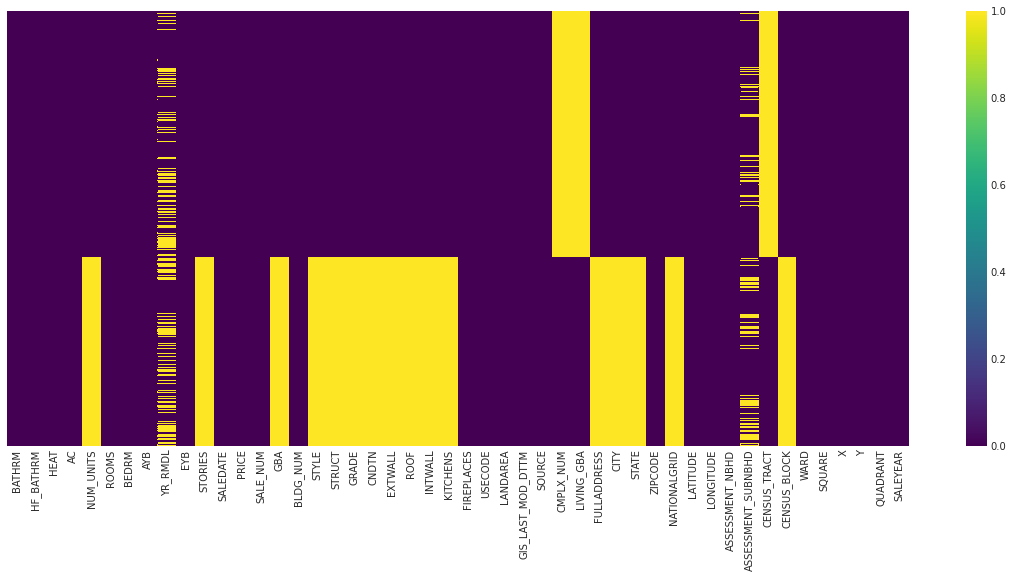

In [13]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(df_2010_1.isnull(), yticklabels=False,cmap='viridis')
plt.show()

In [14]:
#drop large missing value : CMPLX_NUM, LIVING_GBA, CENSUS_TRACT
#drop high cardinality : ASSESSMENT_SUBNBHD
df_clean_1 = df_2010_1.drop(['CMPLX_NUM','LIVING_GBA','CENSUS_TRACT','ASSESSMENT_SUBNBHD'],axis=1)

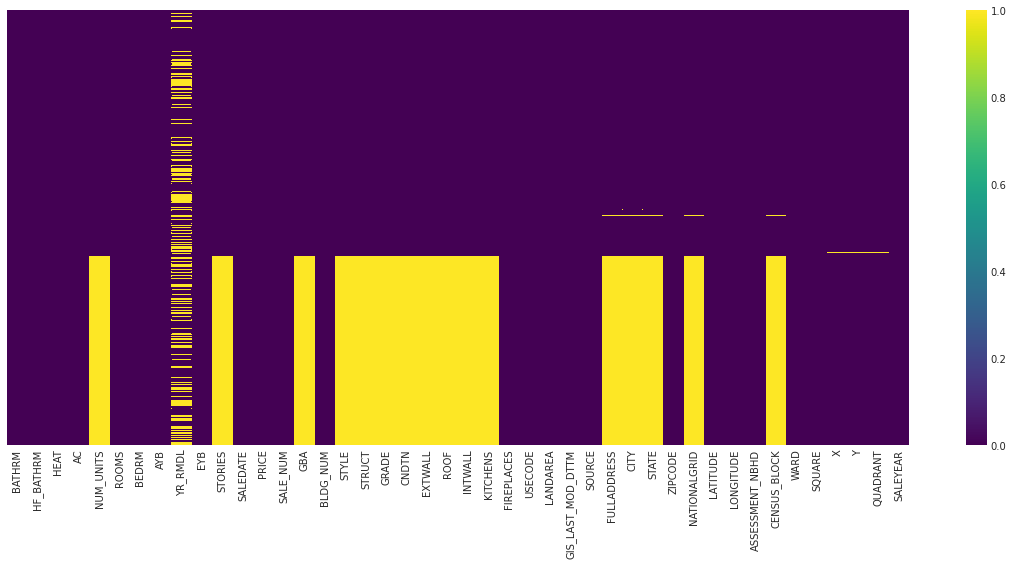

In [15]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(df_clean_1.isnull(), yticklabels=False,cmap='viridis')
plt.show()